# <div align="center"> Carbon Impact - Data Generation </div>

<div align="center"> ROULET Maria Paula | ROUX Dorian - Bachelor 4</div>

---

### Libraries

In [2]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

### Read Data Files

In [31]:
sample_apps = pd.read_csv("Data/apps.csv", delimiter=';')
sample_apps.sample(5)

,Application,Actions,Carbon_Impact
10,Tixeo,Video Conferencing,0.153
18,Yahoo,Basic Research,0.100
12,Skype,Video Conferencing,0.200
11,Microsoft Teams,Video Conferencing,0.154
16,Google,Basic Research,0.140


### Functions

In [5]:
#Function to append the value to the corresponding dictionnary key
def append_dict(data_dict, lst_key, lst_value):
    for key, val in zip(lst_key, lst_value):
        data_dict[key].append(val)
    return data_dict

In [77]:
#Function that generate values corresponding to some conditions
def generate_time_data(current_daytime, weekdays):
    year = current_daytime.year
    month = current_daytime.month
    day = current_daytime.day
    weekday = weekdays[current_daytime.weekday()]
    time_hm = current_daytime.time()
    
    return year, month, day, weekday, time_hm

In [70]:
#Function that generate values corresponding to some conditions
def generate_values(sample_apps, user_browser, user_vconf, daily_cons, moment):
    
    #If Weekend (S&S)
    if moment == "Day Off":
        act = "Day Off"
        app = "No Computer Acces"
        carbon = 0
        daily_cons += carbon
        return app, act, carbon, daily_cons

    elif moment == "Late":
        act = "Late at Work"
        app = "No Computer Use"
        carbon = 0
        daily_cons += carbon 
        return app, act, carbon, daily_cons
       
    elif moment == "Normal Work with CI":
        act = random.choice(np.unique(sample_apps.Actions))
        conditions_app = [act == 'Basic Research', act == 'Video Conferencing', act == 'Newsfeed']
        choice_app = [user_browser, random.choice(user_vconf), random.choice(np.unique(sample_apps.Application[sample_apps.Actions == act]))]
        app = np.select(conditions_app, choice_app)
        carbon = float(sample_apps.Carbon_Impact[sample_apps.Application == app])
        if act == 'Newsfeed':
            duration = random.randint(1,20)
        elif act == 'Video Conferencing':
            duration = random.randint(20, 90)      
        else:
            duration = random.randint(1, 5)
        return app, act, carbon, duration
                
    elif moment == "Normal Work without CI":
        act = "No Carbon Action"
        app = "No Carbon App Used"
        carbon = 0
        daily_cons += carbon
        return app, act, carbon, daily_cons
    
    elif moment == "Lunch Break":
        act = "Lunch Break"
        app = "No Computer Use"
        carbon = 0
        daily_cons += carbon
        return app, act, carbon, daily_cons

                       

### Data Generation

In [89]:
#Create a dictionnary of all the information
app_dict = {"Employee ID":[], 
            "Full Date":[], "Year":[], "Month":[], "Day":[], "Weekday":[], "Time":[], 
            "App":[], "Action Type":[], "Time Spent":[], 
            "App Carbon Impact":[], "Daily Consumption":[], "Level of Carbon Consumption":[]
}

weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]  #Weekdays
profiles = ["High Carbon Consumption", "Medium-High Carbon Consumption", "Medium-Low Carbon Consumption", "Low Carbon Consumption"] #Type of Consumption

#Begin and End Dates
start = datetime.datetime(2021, 1, 1, 9, 0) #2021-1-1 9AM
end = datetime.datetime(2021, 6, 1, 18, 0) #2021-3-1 6PM

#Initial information
num_employees = random.randint(12,15) #Number of Employees

for id in range(1, num_employees): #Loop for each Employee
    
    #Initial Employee and Time Information 
    profile = random.choice(profiles) #Type of Consumption Profile
    current_day = start #Set the Initial Date
    user_browser = random.choice(np.unique(sample_apps.Application[sample_apps.Actions == "Basic Research"])) #Select a single Browser
    user_vconf = [random.choice(np.unique(sample_apps.Application[sample_apps.Actions == "Video Conferencing"])) for _ in range(2)] #Select up to two different Video Conferencing App
    
    while current_day <= end: #Loop for each Day
        end_day = datetime.datetime(current_day.year, current_day.month, current_day.day, 18, 0) #Set the Daily End Work Hours
        daily_cons = 0 #Set the Daily Carbon Consumption as 0

        if weekdays[current_day.weekday()] == "Saturday" or weekdays[current_day.weekday()] == "Sunday": #Check if the Current Day is a Weekend
            timestamp = current_day #Define the Initial Time of the Current Day
            d = 1 #Set a counter
            while timestamp <= end_day: #Loop for the Day 
                act, app, carbon, daily_cons = generate_values(sample_apps, user_browser, user_vconf, daily_cons, "Day Off") 
                year, month, day, weekday, time = generate_time_data(timestamp, weekdays)
                lst_values = [id, timestamp, year, month, day, weekday, time, app, act, d, carbon, daily_cons, profile]
                append_dict(app_dict, list(app_dict.keys()), lst_values)
                timestamp += datetime.timedelta(minutes=1) #Incremente the Current Time by a minute
                d += 1

                
        else: #If Current Day is not a Weekend
            true_start = current_day + datetime.timedelta(minutes=random.randint(-20, 30)) #Define the True Time (when the employee arrives at the Office)
            lunch_break = False #Set the "Lunch Break" Boolean at False
            timestamp = current_day if true_start > current_day else true_start #Define the Initial Time depending on a Condition
            
            if timestamp < true_start: #Check that the Initial Time is lower than the True Time
                for d in range(1, int((true_start - current_day).seconds/60)+1): #Loop for the Time the Employee is Late
                    act, app, carbon, daily_cons = generate_values(sample_apps, user_browser, user_vconf, daily_cons, "Late")  
                    year, month, day, weekday, time = generate_time_data(timestamp, weekdays)
                    lst_values = [id, timestamp, year, month, day, weekday, time, app, act, d, carbon, daily_cons, profile]
                    append_dict(app_dict, list(app_dict.keys()), lst_values)
                    timestamp += datetime.timedelta(minutes=1) #Incremente the Current Time by a minute
            else:
                continue    
            
            #Then 
            while timestamp <= end_day: #Loop for the Day
                
                rand = random.uniform(0, 1)
                conditions_use_app = [profile == "High Carbon Consumption" and rand > 0.2, 
                                      profile == "Medium-High Carbon Consumption" and rand > 0.4,
                                      profile == "Medium-Low Carbon Consumption" and rand > 0.6, 
                                      profile == "Low Carbon Consumption" and rand > 0.8, ]
                choice_use_app = [True for _ in range(len(conditions_use_app))] 
                use_app = np.select(conditions_use_app, choice_use_app)
                
                if use_app == True: #Check if the Employee use an App with a Carbon Impact
                    
                    act, app, carbon, duration = generate_values(sample_apps, user_browser, user_vconf, daily_cons, "Normal Work with CI") 
                    for d in range(1, duration+1):
                        daily_cons += carbon
                        year, month, day, weekday, time = generate_time_data(timestamp, weekdays)
                        lst_values = [id, timestamp, year, month, day, weekday, time, app, act, d, carbon, daily_cons, profile]
                        append_dict(app_dict, list(app_dict.keys()), lst_values)
                            
                        #If condition to set break and end of day
                        if lunch_break == False and timestamp > datetime.datetime(timestamp.year, timestamp.month, timestamp.day, 11, 30) and d/duration > 0.75:
                            lunch_break = True
                            duration = random.randint(30, 90)
                            for d in range(1, duration+1):
                                act, app, carbon, daily_cons = generate_values(sample_apps, user_browser, user_vconf, daily_cons, "Lunch Break")  
                                year, month, day, weekday, time = generate_time_data(timestamp, weekdays)
                                lst_values = [id, timestamp, year, month, day, weekday, time, app, act, d, carbon, daily_cons, profile]
                                append_dict(app_dict, list(app_dict.keys()), lst_values)
                                timestamp += datetime.timedelta(minutes=1)                    
                            break
                    
                        if timestamp > end_day + datetime.timedelta(minutes = 59):
                            break
                        else:      
                            timestamp += datetime.timedelta(minutes=1)
                    
                elif use_app == False: #If the Employee do not use an App with a Carbon Impact
                    duration = random.randint(0, 15)
                    for d in range(1, duration+1):
                        act, app, carbon, daily_cons = generate_values(sample_apps, user_browser, user_vconf, daily_cons, "Normal Work without CI")  
                        year, month, day, weekday, time = generate_time_data(timestamp, weekdays)
                        lst_values = [id, timestamp, year, month, day, weekday, time, app, act, d, carbon, daily_cons, profile]
                        append_dict(app_dict, list(app_dict.keys()), lst_values)
                        timestamp += datetime.timedelta(minutes=1)  
                        
                
                         #If condition to set break and end of day
                        if lunch_break == False and timestamp > datetime.datetime(timestamp.year, timestamp.month, timestamp.day, 11, 30) and d/duration > 0.75:
                            lunch_break = True
                            duration = random.randint(30, 90)
                            for d in range(1, duration+1):
                                act, app, carbon, daily_cons = generate_values(sample_apps, user_browser, user_vconf, daily_cons, "Lunch Break")  
                                year, month, day, weekday, time = generate_time_data(timestamp, weekdays)
                                lst_values = [id, timestamp, year, month, day, weekday, time, app, act, d, carbon, daily_cons, profile]
                                append_dict(app_dict, list(app_dict.keys()), lst_values)
                                timestamp += datetime.timedelta(minutes=1)                    
                            break
                    
                        if timestamp > end_day + datetime.timedelta(minutes = 59):
                            break
                        else:      
                            timestamp += datetime.timedelta(minutes=1)
                                    
        current_day += datetime.timedelta(days=1)

Use_App = pd.DataFrame.from_dict(app_dict)

Use_App.to_csv("Data/time_apps.csv")

Use_App

,Employee ID,Full Date,Year,Month,Day,Weekday,Time,App,Action Type,Time Spent,App Carbon Impact,Daily Consumption,Level of Carbon Consumption
0,1,2021-01-01 09:00:00,2021,1,1,Friday,09:00:00,Late at Work,No Computer Use,1,0.00,0.000,Low Carbon Consumption
1,1,2021-01-01 09:01:00,2021,1,1,Friday,09:01:00,Late at Work,No Computer Use,2,0.00,0.000,Low Carbon Consumption
2,1,2021-01-01 09:02:00,2021,1,1,Friday,09:02:00,Late at Work,No Computer Use,3,0.00,0.000,Low Carbon Consumption
3,1,2021-01-01 09:03:00,2021,1,1,Friday,09:03:00,Late at Work,No Computer Use,4,0.00,0.000,Low Carbon Consumption
4,1,2021-01-01 09:04:00,2021,1,1,Friday,09:04:00,Late at Work,No Computer Use,5,0.00,0.000,Low Carbon Consumption
...,...,...,...,...,...,...,...,...,...,...,...,...,...
892411,12,2021-06-01 18:26:00,2021,6,1,Tuesday,18:26:00,Video Conferencing,Zoom,57,0.23,185.142,High Carbon Consumption
892412,12,2021-06-01 18:27:00,2021,6,1,Tuesday,18:27:00,Video Conferencing,Zoom,58,0.23,185.372,High Carbon Consumption
892413,12,2021-06-01 18:28:00,2021,6,1,Tuesday,18:28:00,Video Conferencing,Zoom,59,0.23,185.602,High Carbon Consumption
892414,12,2021-06-01 18:29:00,2021,6,1,Tuesday,18:29:00,Video Conferencing,Zoom,60,0.23,185.832,High Carbon Consumption


In [90]:
Use_App.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892416 entries, 0 to 892415
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Employee ID                  892416 non-null  int64         
 1   Full Date                    892416 non-null  datetime64[ns]
 2   Year                         892416 non-null  int64         
 3   Month                        892416 non-null  int64         
 4   Day                          892416 non-null  int64         
 5   Weekday                      892416 non-null  object        
 6   Time                         892416 non-null  object        
 7   App                          892416 non-null  object        
 8   Action Type                  892416 non-null  object        
 9   Time Spent                   892416 non-null  int64         
 10  App Carbon Impact            892416 non-null  float64       
 11  Daily Consumption         

In [91]:
Use_App.groupby(['Level of Carbon Consumption'])['App Carbon Impact'].sum().reset_index()

,Level of Carbon Consumption,App Carbon Impact
0,High Carbon Consumption,66488.032
1,Low Carbon Consumption,17540.695
2,Medium-High Carbon Consumption,41282.426
3,Medium-Low Carbon Consumption,17896.433


In [93]:
Use_App.groupby(['Weekday'])['App Carbon Impact'].sum().reset_index()

,Weekday,App Carbon Impact
0,Friday,29004.799
1,Monday,29625.299
2,Saturday,0.000
3,Sunday,0.000
4,Thursday,28484.320
5,Tuesday,28966.125
6,Wednesday,27127.043


In [94]:
Use_App.groupby(['Day', 'Level of Carbon Consumption'])['App Carbon Impact'].sum().reset_index()

,Day,Level of Carbon Consumption,App Carbon Impact
0,1,High Carbon Consumption,3176.902
1,1,Low Carbon Consumption,644.905
2,1,Medium-High Carbon Consumption,1910.592
3,1,Medium-Low Carbon Consumption,597.966
4,2,High Carbon Consumption,1782.609
...,...,...,...
119,30,Medium-Low Carbon Consumption,356.778
120,31,High Carbon Consumption,1269.751
121,31,Low Carbon Consumption,309.670
122,31,Medium-High Carbon Consumption,837.534


In [95]:
Use_App.groupby(['Month', 'Level of Carbon Consumption'])['App Carbon Impact'].sum().reset_index()

,Month,Level of Carbon Consumption,App Carbon Impact
0,1,High Carbon Consumption,12711.665
1,1,Low Carbon Consumption,3260.491
2,1,Medium-High Carbon Consumption,7731.800
3,1,Medium-Low Carbon Consumption,3497.138
4,2,High Carbon Consumption,12701.917
5,2,Low Carbon Consumption,3075.688
6,2,Medium-High Carbon Consumption,8023.168
7,2,Medium-Low Carbon Consumption,3324.178
8,3,High Carbon Consumption,14033.444
9,3,Low Carbon Consumption,3466.947


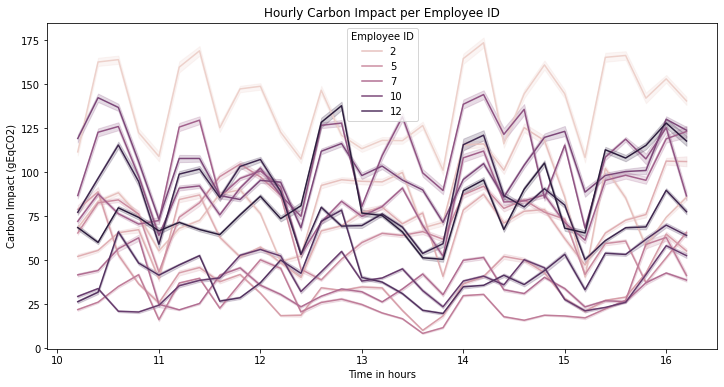

In [404]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x="Day", y="Daily Consumption", hue = "Employee ID", data = Use_App)
ax.set_xticklabels([i for i in range(9, 19)])
ax.set_xlabel('Time in hours')
ax.set_ylabel('Carbon Impact (gEqCO2)')
plt.title("Hourly Carbon Impact per Employee ID")

plt.show()

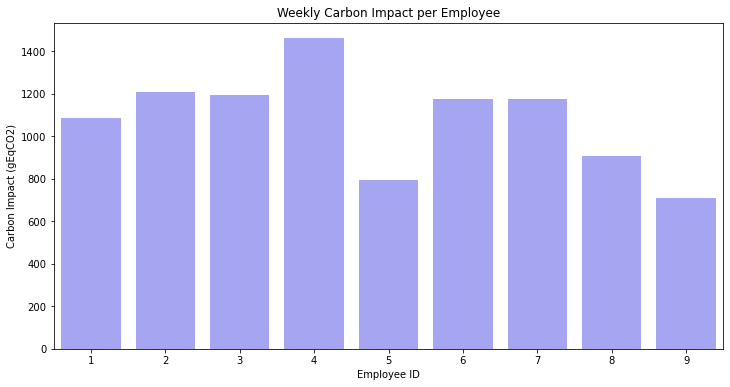

In [94]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="ID", y="Weekly Daily Carbon Impact", data = New_Use_App, color = "blue", alpha = 0.4)
ax.set_xlabel('Employee ID')
ax.set_ylabel('Carbon Impact (gEqCO2)')
plt.title("Weekly Carbon Impact per Employee")

plt.show()

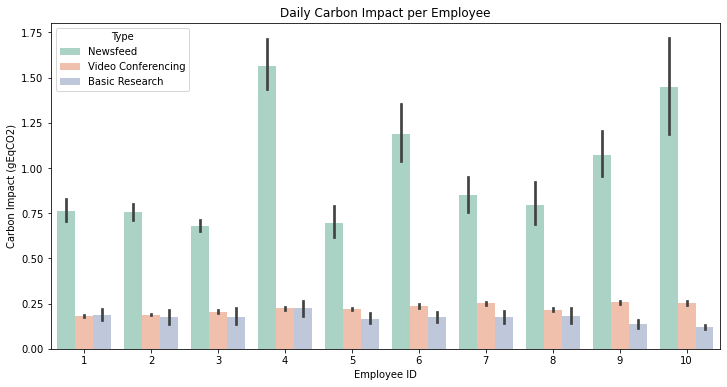

In [81]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="ID", y="Carbon Impact per Minute", hue = "Type", data = Use_App, palette = "Set2")
ax.set_xlabel('Employee ID')
ax.set_ylabel('Carbon Impact (gEqCO2)')
plt.title("Daily Carbon Impact per Employee")

plt.show()

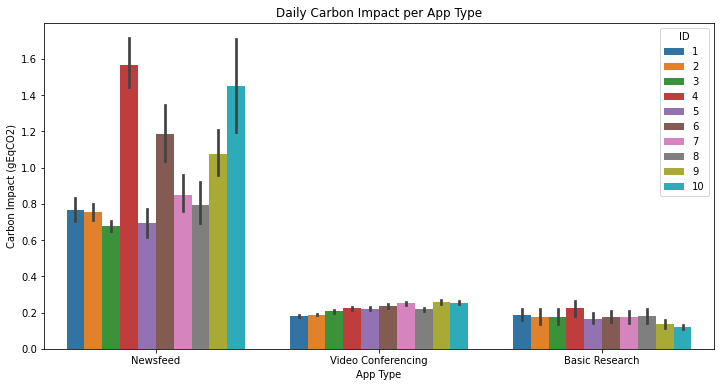

In [89]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Type", y="Carbon Impact per Minute", hue = "ID", data = Use_App)
ax.set_xlabel('App Type')
ax.set_ylabel('Carbon Impact (gEqCO2)')
plt.title("Daily Carbon Impact per App Type")

plt.show()